In [1]:
# Data - 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
# Source: https://github.com/CSSEGISandData/COVID-19 

This notebook is used to generate the following viz:
* World Infection Map;
* World Rankings;
* Confirmed, Deaths, Recovered, and Actives Timeseries;

In [2]:
# Data From https://www.kaggle.com/imdevskp/corona-virus-report
import numpy as np
import pandas as pd 
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import moviepy.editor as mp
from IPython.display import Video
import imageio
from methods import *

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[~world.name.isin(["Antarctica", "Fr. S. Antarctic Lands"])]
#PATH = "C:/py/covid19/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/"
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
path = 'data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
owid_path = 'data/covid-19-data/public/data/testing/covid-testing-all-observations.csv'
file = '05-14-2020.csv'
today = '05-14-2020'
today = pd.to_datetime(today, format = "%m-%d-%Y")
df = pd.read_csv(path+file)
df.head()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-15 02:33:02,34.223334,-82.461707,34,0,0,34,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-15 02:33:02,30.295065,-92.414197,159,11,0,148,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-15 02:33:02,37.767072,-75.632346,593,8,0,585,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-15 02:33:02,43.452658,-116.241552,759,22,0,737,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-15 02:33:02,41.330756,-94.471059,4,0,0,4,"Adair, Iowa, US"


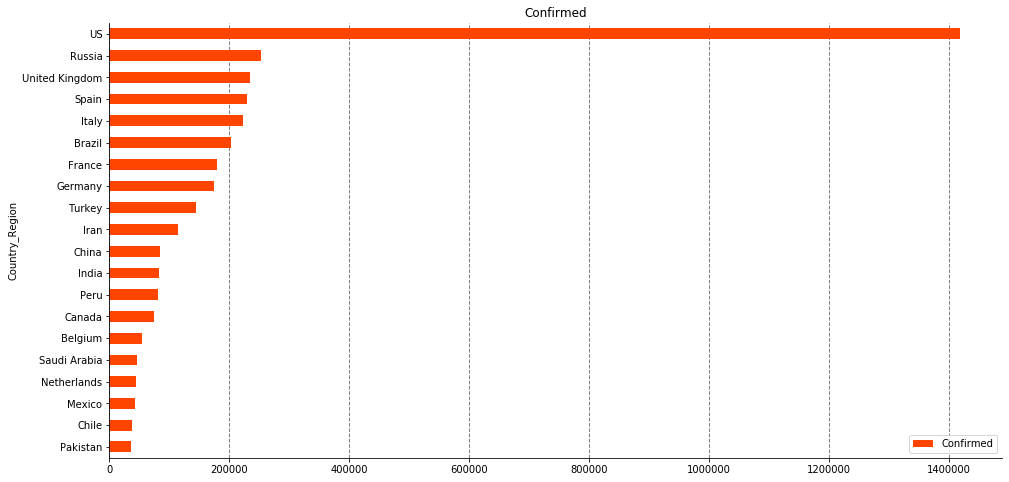

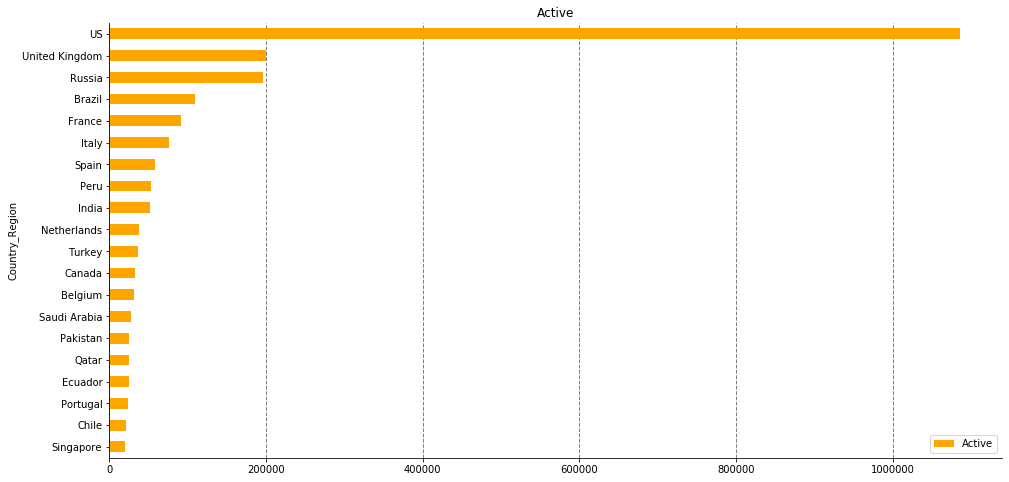

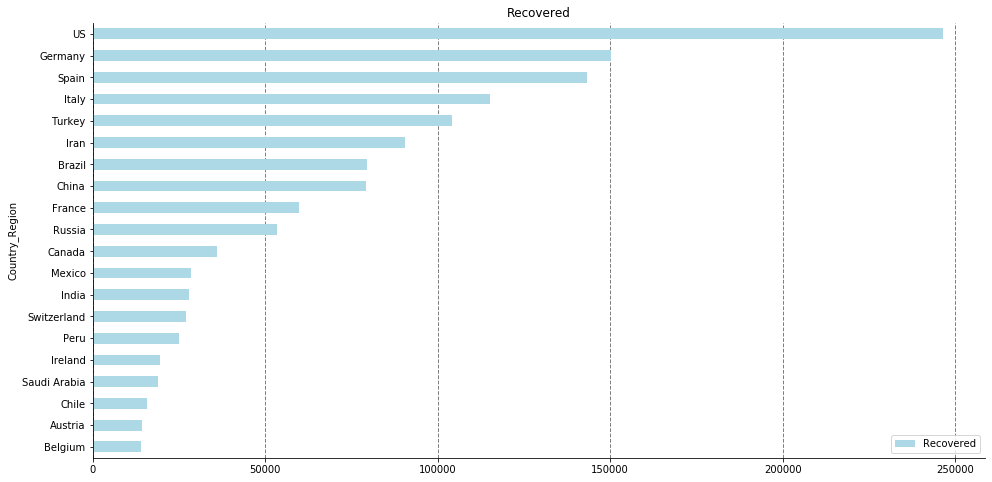

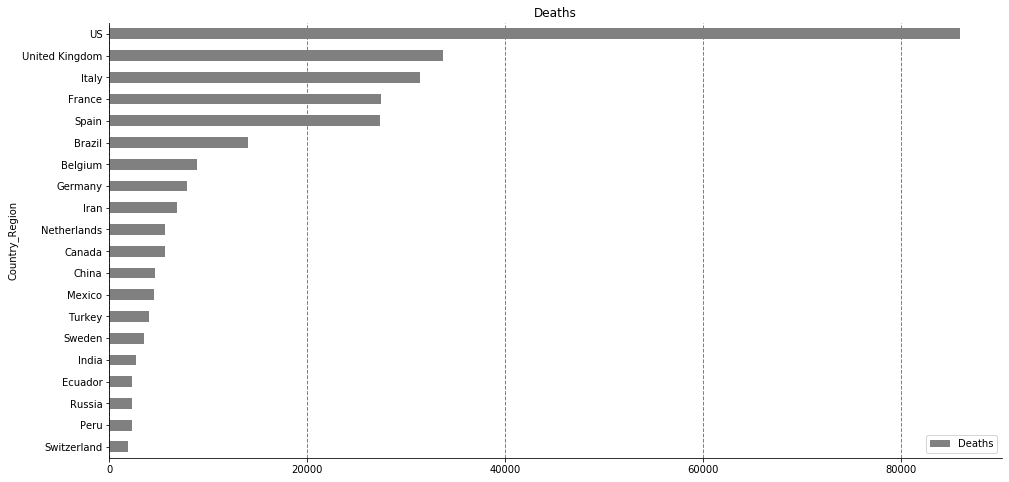

In [3]:
plot_rank('Confirmed', 20, 'orangered')
plot_rank('Active', 20, 'orange')
plot_rank('Recovered', 20, 'lightblue')
plot_rank('Deaths', 20, 'grey')

# TIMESERIES

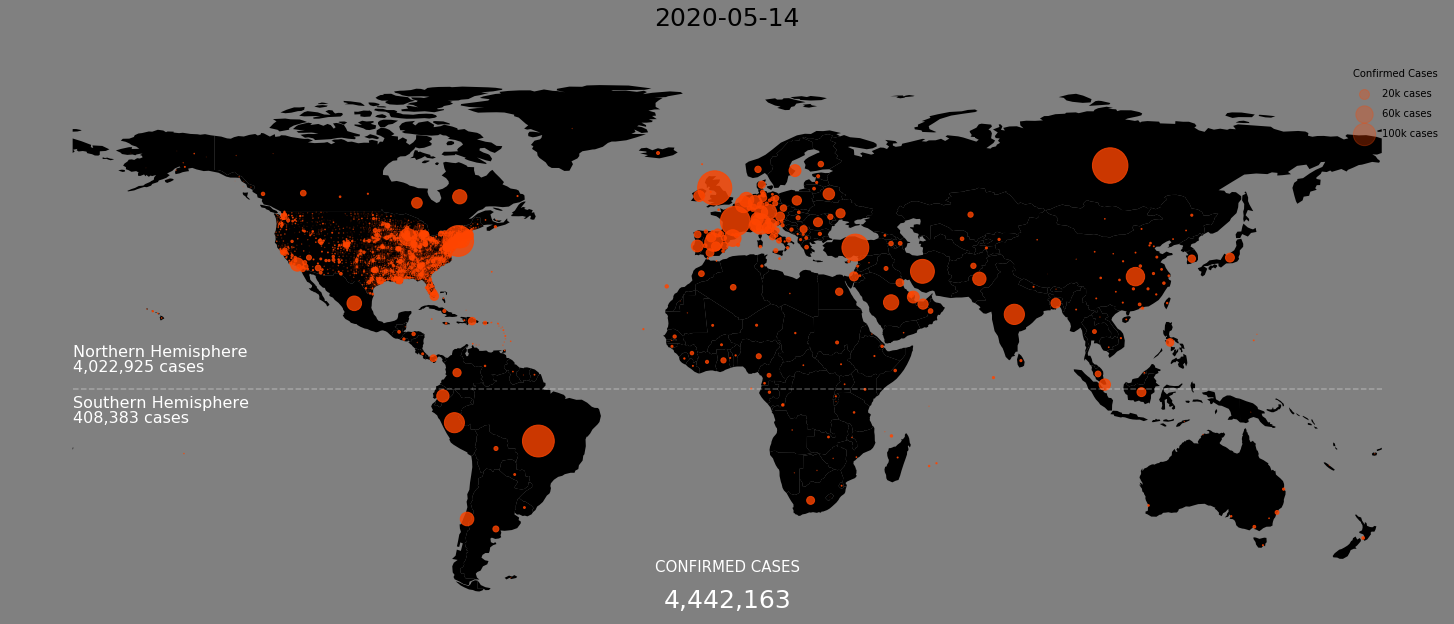

In [4]:
plot_map(df, today)

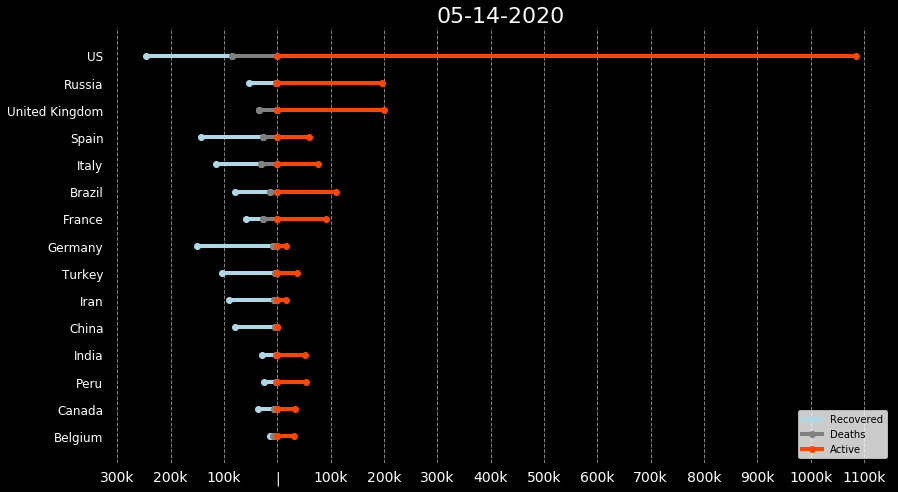

In [5]:
get_rank()

In [6]:
plt.close('all')

## Trends

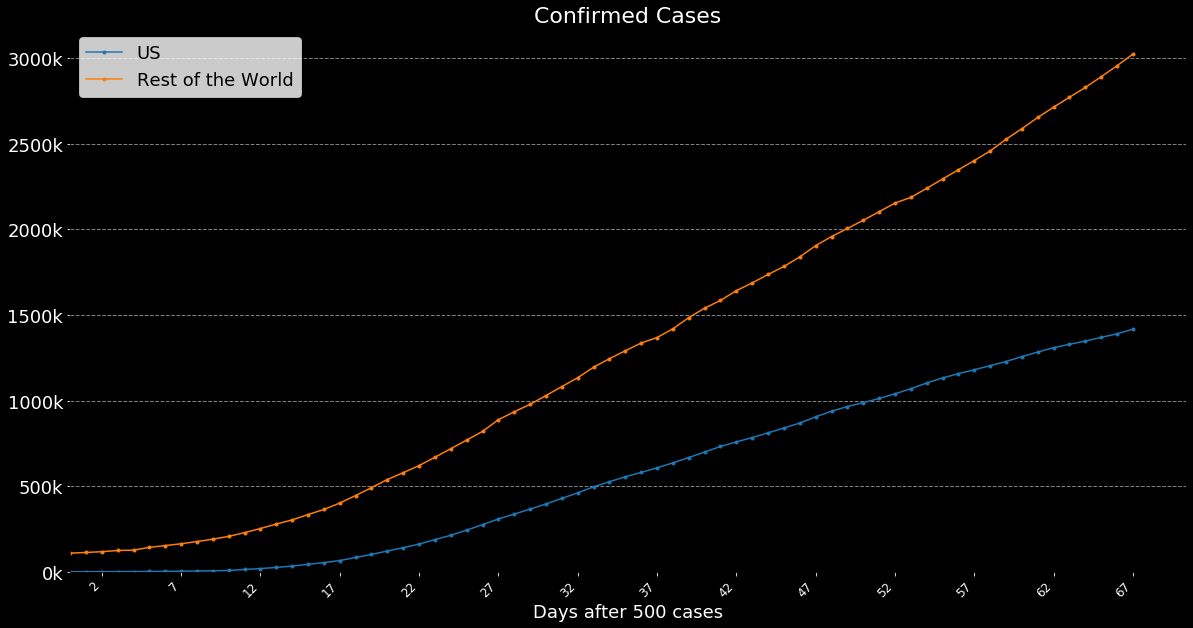

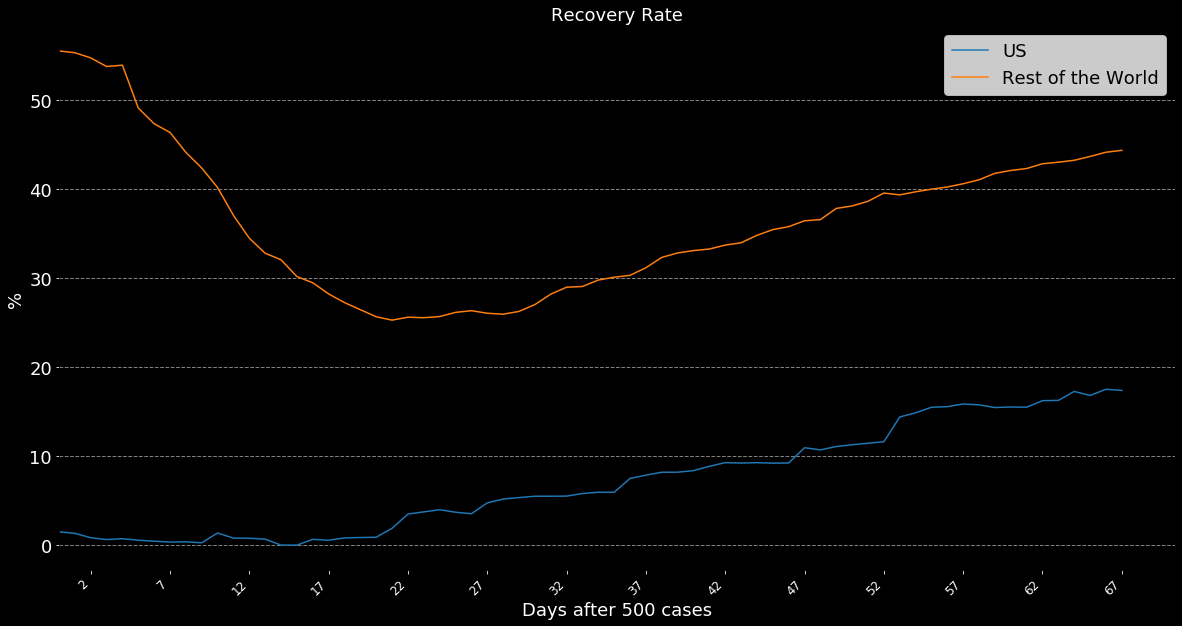

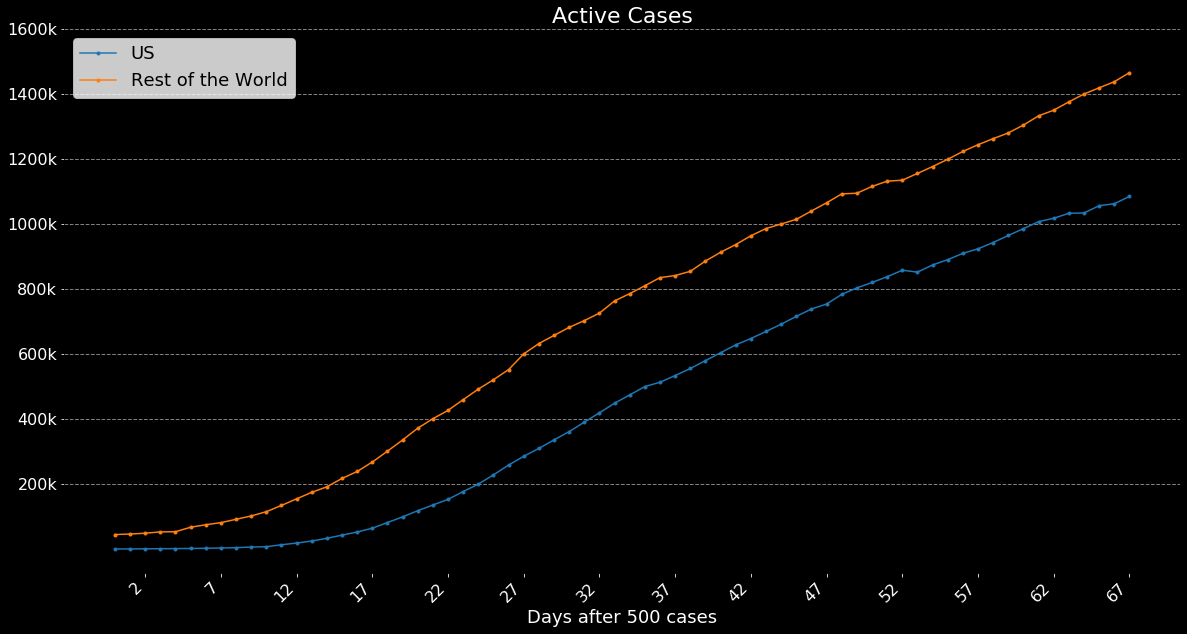

In [7]:
# US hit 500 on 03-08-2020
# Italy hit 500 on 02-27-2020
# Spain hit 500 on 03-07-2020
# Germany hit 500 on 03-06-2020

# Infected People

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

# plot
plot_contry(ax, ['US'], '03-08-2020', '03-09-2020')
plot_contry(ax, ['US'], '03-08-2020', '03-09-2020', inverse=True)

# yticks
yticks = np.arange(0, 3000001, 500000)
yticks_label =[str(int(i/1000)) + 'k' for i in yticks]
plt.yticks(yticks, labels = yticks_label, fontsize=18)

# details
plt.xlim(0,)
plt.ylim(0,)
plt.legend(['US', 'Rest of the World'], fontsize=18)

plt.savefig('img/conf_us.png', facecolor='black', edgecolor='none')
#plt.show()
# Mortality

# Recovery
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_r(ax, ['US'], '03-08-2020', '03-09-2020')
plot_contry_r(ax, ['US'], '03-08-2020', '03-09-2020', inverse=True)
plt.xlim(0,)

plt.legend(['US', 'Rest of the World'], fontsize=18)
plt.savefig('img/rec_us.png', facecolor='black', edgecolor='none')
#plt.show()

# Active
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_a(ax, ['US'], '03-08-2020', '03-09-2020')
plot_contry_a(ax, ['US'], '03-08-2020', '03-09-2020', inverse=True)
yticks = np.arange(200000, 1600001, 200000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]

plt.yticks(yticks, labels = yticks_label, fontsize=16)
plt.xticks(fontsize=16)
plt.legend(['US', 'Rest of the World'], fontsize=18)

plt.savefig('img/active_us.png', facecolor='black', edgecolor='none')
#plt.show()

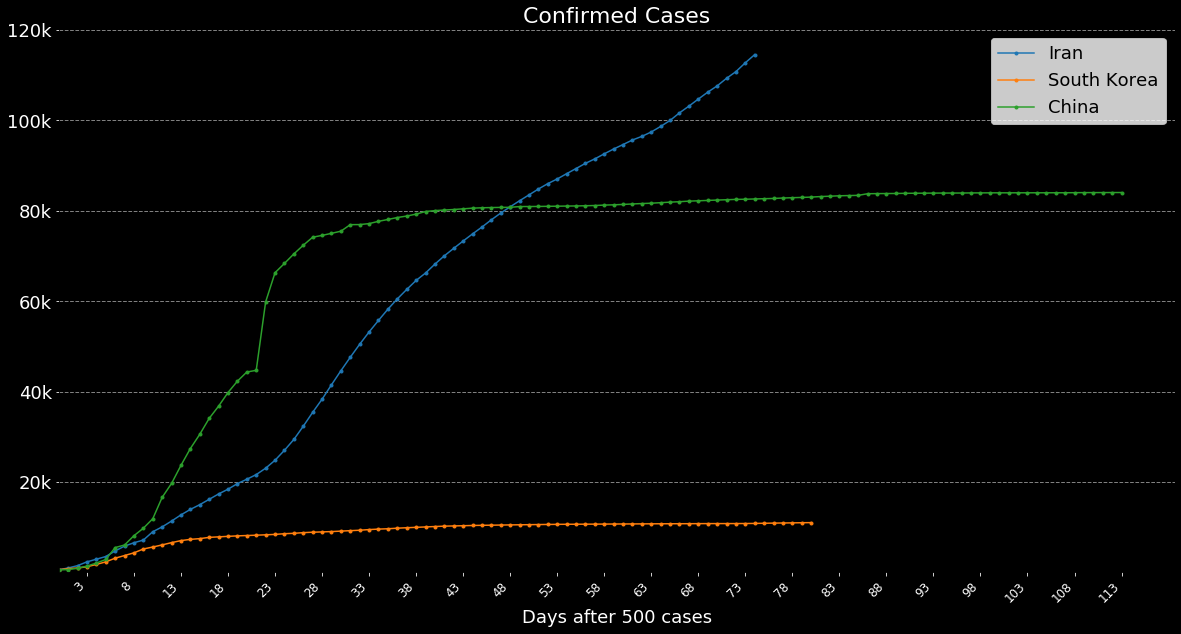

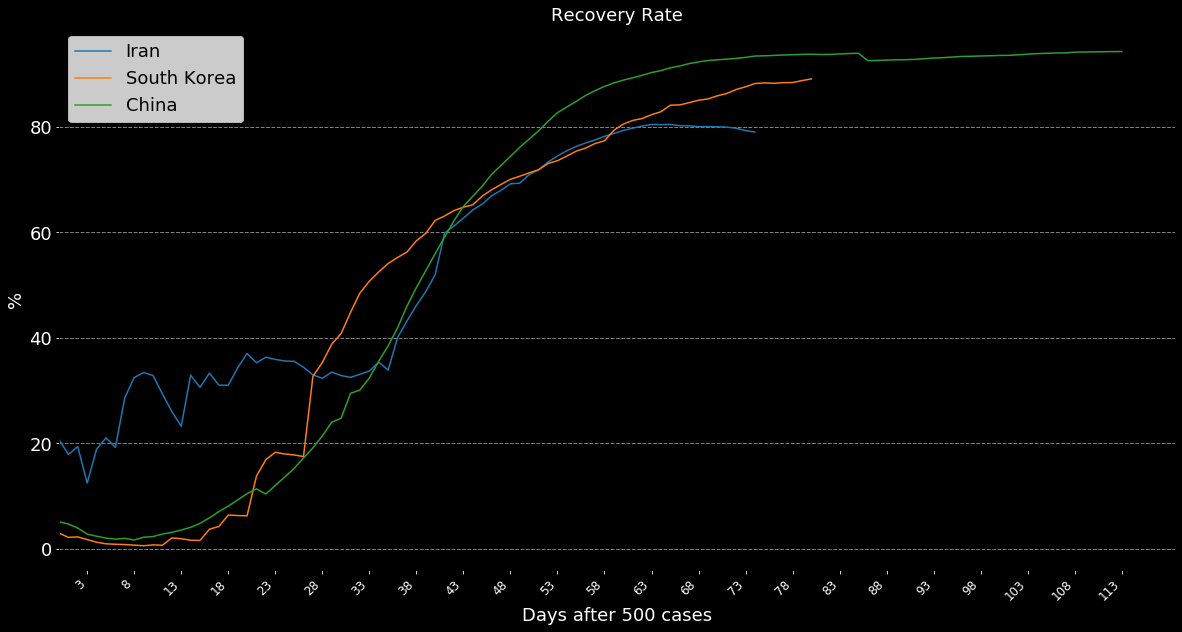

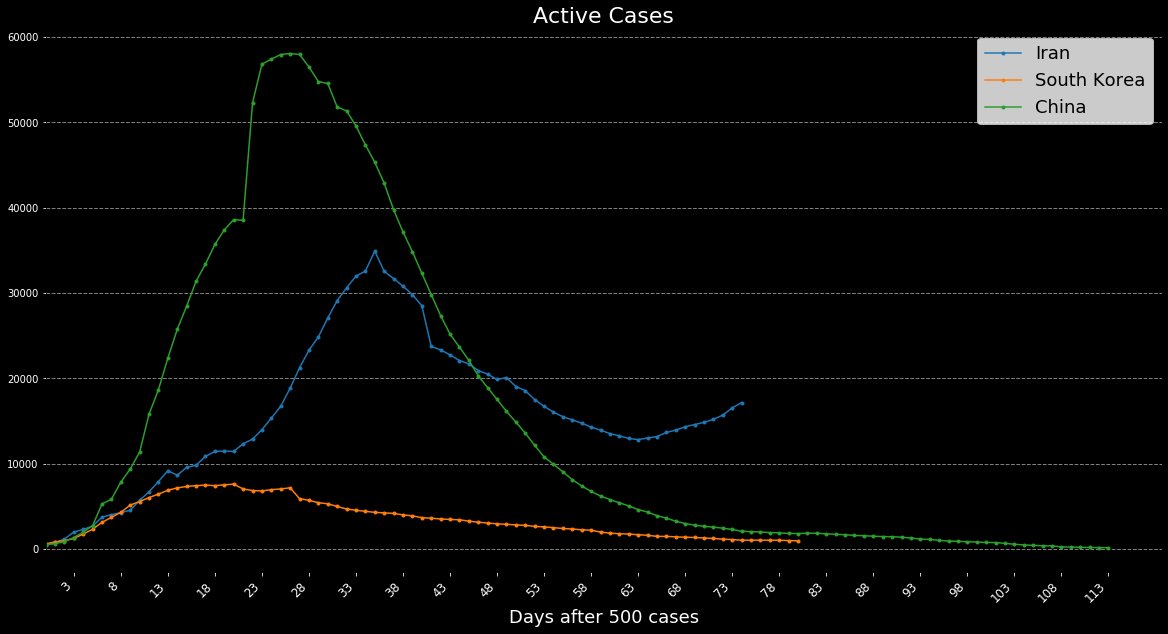

In [8]:
# Infected People

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry(ax, ['Iran'], '02-29-2020', '03-01-2020')
plot_contry(ax, ['South Korea', 'Korea, South'], '02-23-2020', '02-24-2020')
plot_contry(ax, ['China', 'Mainland China'])

yticks = np.arange(20000, 120001, 20000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]

plt.yticks(yticks, labels = yticks_label, fontsize=18)

plt.xlim(0,)
plt.ylim(0,)
plt.legend(['Iran', 'South Korea', 'China'], fontsize=18)
plt.savefig('img/conf_china.png', facecolor='black', edgecolor='none')

# Recovery

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_r(ax, ['Iran'], '02-29-2020', '03-01-2020')
plot_contry_r(ax, ['South Korea', 'Korea, South'], '02-23-2020', '02-24-2020')
plot_contry_r(ax, ['China', 'Mainland China'], inverse=False)

plt.xlim(0,)

plt.legend(['Iran', 'South Korea', 'China'], fontsize=18)
plt.savefig('img/rec_china.png', facecolor='black', edgecolor='none')

# Active

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_a(ax, ['Iran'], '02-29-2020', '03-01-2020')
plot_contry_a(ax, ['South Korea', 'Korea, South'], '02-23-2020', '02-24-2020')
plot_contry_a(ax, ['China', 'Mainland China'], inverse=False)

plt.xlim(0,)

plt.legend(['Iran', 'South Korea', 'China'], fontsize=18)
plt.savefig('img/active_china.png', facecolor='black', edgecolor='none')

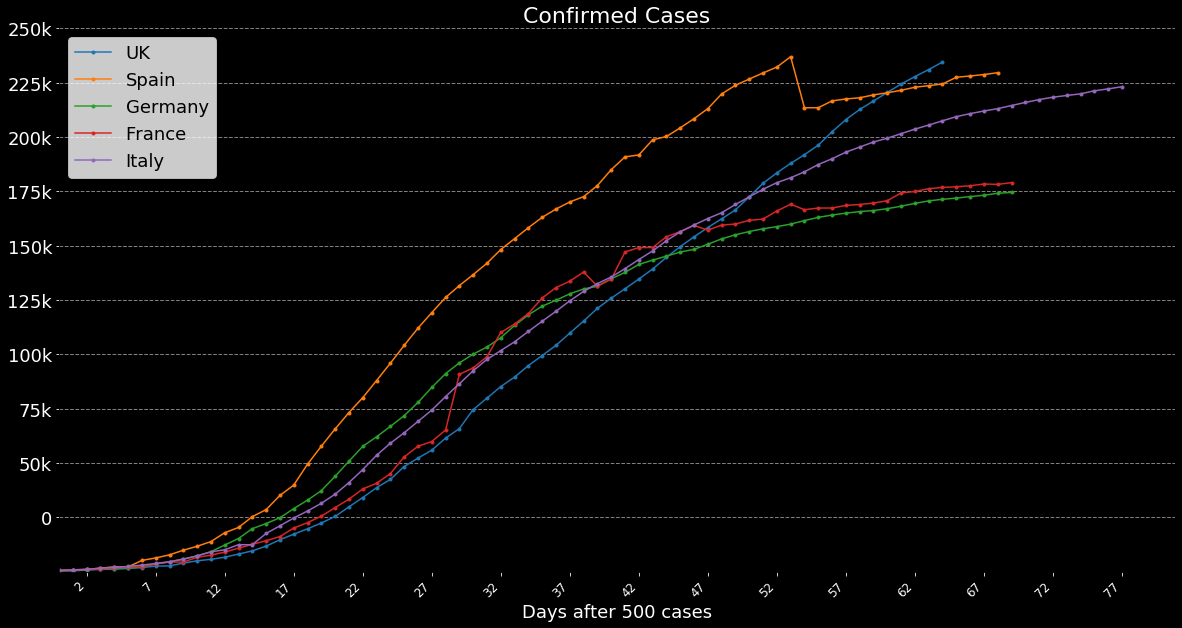

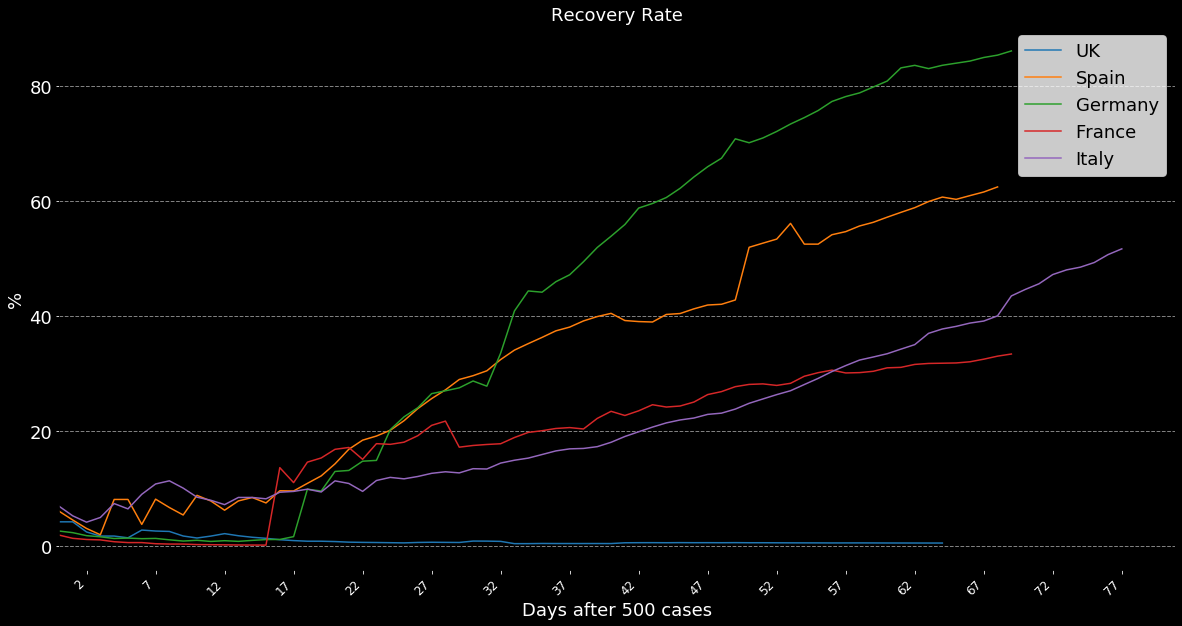

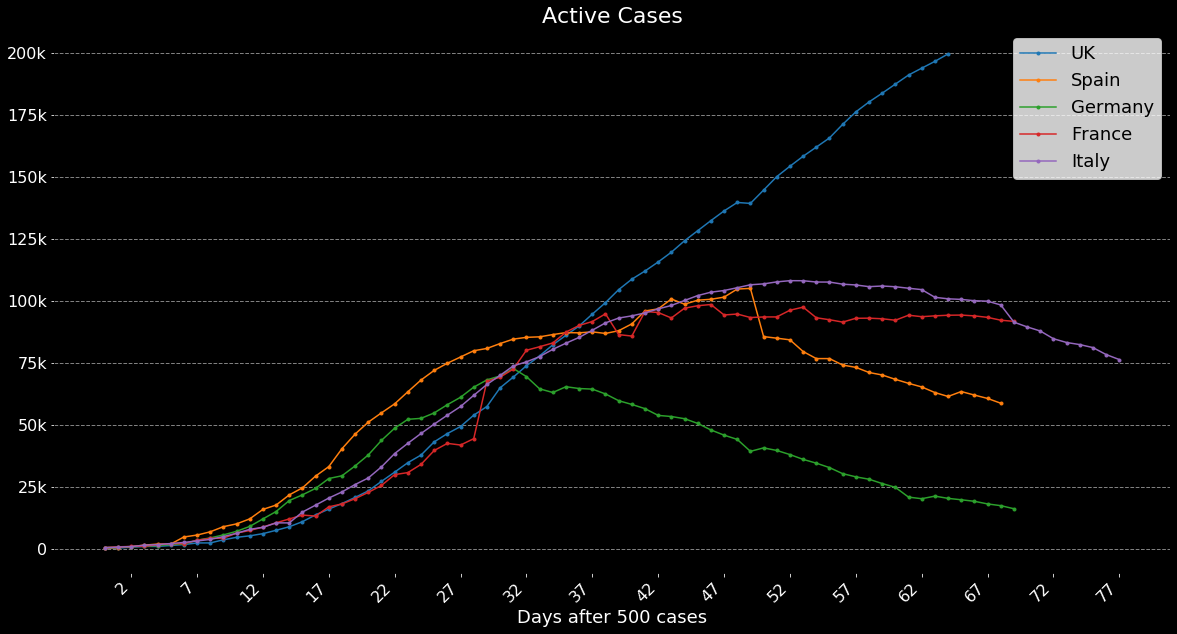

In [9]:
# US hit 500 on 03-08-2020
# Italy hit 500 on 02-27-2020
# Spain hit 500 on 03-07-2020
# Germany hit 500 on 03-06-2020

# Infected People

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

# plot
#plot_contry(['US'], '03-08-2020', '03-09-2020')
plot_contry(ax, ['United Kingdom'], '03-06-2020', '03-07-2020')
plot_contry(ax, ['Spain'], '03-07-2020', '03-08-2020')
plot_contry(ax, ['Germany'], '03-06-2020', '03-07-2020')
plot_contry(ax, ['France'], '03-06-2020', '03-07-2020')
plot_contry(ax, ['Italy'], '02-27-2020', '02-28-2020')

# yticks
yticks = np.arange(25000, 250001, 25000)
yticks_label = [0]+[str(i)[:-3] + 'k' for i in yticks[1:]]
plt.yticks(yticks, labels = yticks_label, fontsize=18)

# details
plt.xlim(0,)
plt.ylim(0,)
plt.legend(['UK', 'Spain', 'Germany', 'France', 'Italy'], fontsize=18)

plt.savefig('img/conf_top.png', facecolor='black', edgecolor='none')

# Recovery
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

#plot_contry_r(['US'], '03-08-2020', '03-09-2020')
plot_contry_r(ax, ['United Kingdom'], '03-06-2020', '03-07-2020')
plot_contry_r(ax, ['Spain'], '03-07-2020', '03-08-2020')
plot_contry_r(ax, ['Germany'], '03-06-2020', '03-07-2020')
plot_contry_r(ax, ['France'], '03-06-2020', '03-07-2020')
plot_contry_r(ax, ['Italy'], '02-27-2020', '02-28-2020')

plt.xlim(0,)

plt.legend(['UK', 'Spain', 'Germany', 'France', 'Italy'], fontsize=18)
plt.savefig('img/rec_top.png', facecolor='black', edgecolor='none')

# Active
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

#plot_contry_a(['US'], '03-08-2020', '03-09-2020')
plot_contry_a(ax, ['United Kingdom'], '03-06-2020', '03-07-2020')
plot_contry_a(ax, ['Spain'], '03-07-2020', '03-08-2020')
plot_contry_a(ax, ['Germany'], '03-06-2020', '03-07-2020')
plot_contry_a(ax, ['France'], '03-06-2020', '03-07-2020')
plot_contry_a(ax, ['Italy'], '02-27-2020', '02-28-2020')

yticks = np.arange(0, 200001, 25000)
yticks_label =[0]+[str(i)[:-3] + 'k' for i in yticks[1:]]

plt.yticks(yticks, labels = yticks_label, fontsize=16)
plt.xticks(fontsize=16)
plt.legend(['UK', 'Spain', 'Germany', 'France', 'Italy'], fontsize=18)

plt.savefig('img/active_top.png', facecolor='black', edgecolor='none')

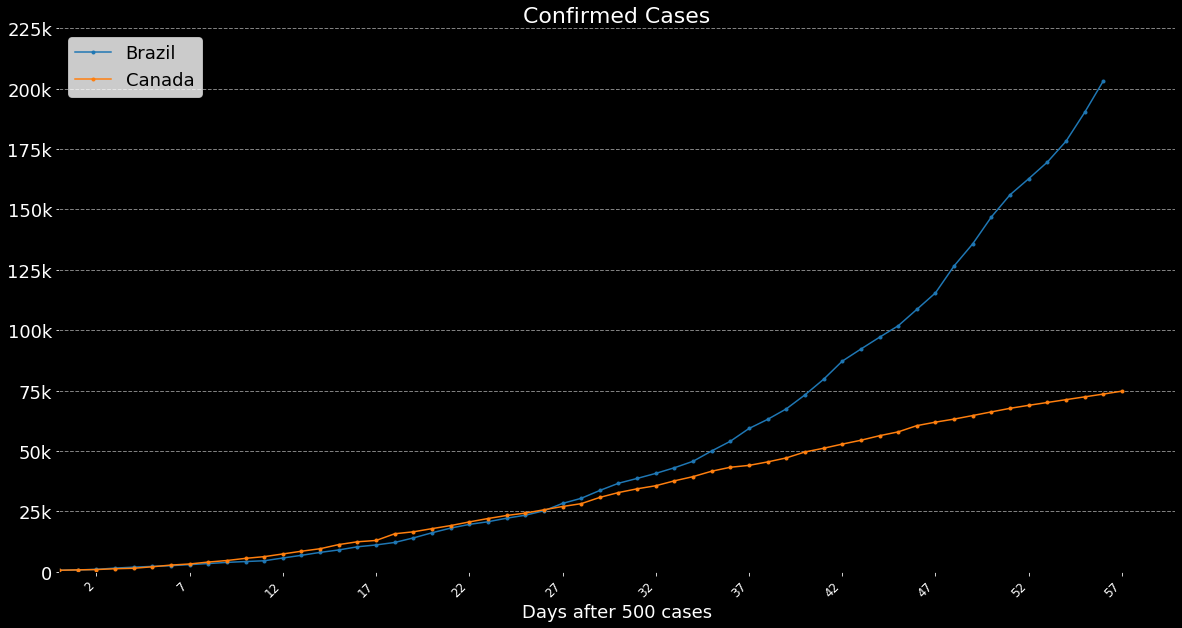

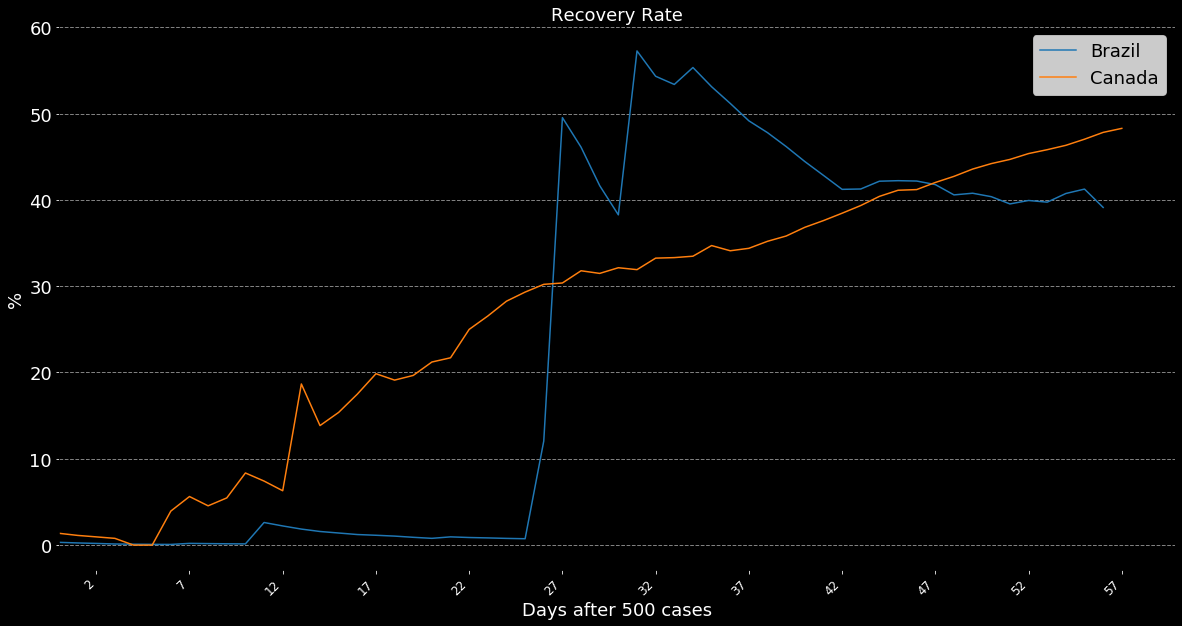

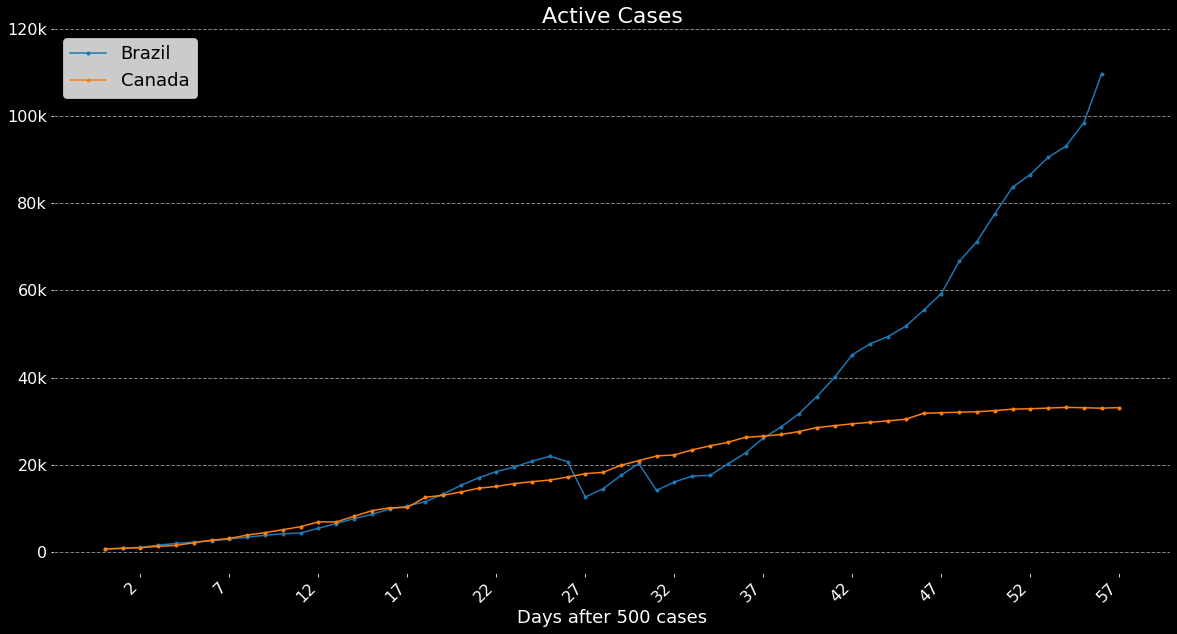

In [41]:
# SK hit 500 on 2/23/20 
# Brazil hit 500 on 3/19/20
# Canada hit 500 on 03-18-2020

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry(ax, ['Brazil'], '03-19-2020', '03-20-2020')
plot_contry(ax, ['Canada'], '03-18-2020', '03-19-2020')

plt.xlim(0,)
plt.ylim(0,)

yticks = np.arange(0, 225001, 25000)
yticks_label =[0]+[str(i)[:-3] + 'k' for i in yticks[1:]]

plt.yticks(yticks, labels = yticks_label, fontsize=18)
plt.legend(['Brazil', 'Canada'], fontsize=18)
plt.savefig('img/conf_selection.png', facecolor='black', edgecolor='none')

# Recovery Rate
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_r(ax, ['Brazil'], '03-19-2020', '03-20-2020')
plot_contry_r(ax, ['Canada'], '03-18-2020', '03-19-2020')
plt.xlim(0,)

plt.legend(['Brazil', 'Canada'], fontsize=18)
plt.savefig('img/rec_selection.png', facecolor='black', edgecolor='none')

# Active
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_a(ax,['Brazil'], '03-19-2020', '03-20-2020')
plot_contry_a(ax,['Canada'], '03-18-2020', '03-19-2020')

yticks = np.arange(0, 120001, 20000)
yticks_label =[0]+[str(i)[:-3] + 'k' for i in yticks[1:]]

plt.yticks(yticks, labels = yticks_label, fontsize=16)
plt.xticks(fontsize=16)
plt.legend(['Brazil', 'Canada'], fontsize=18, loc = "upper left")

plt.savefig('img/active_selection.png', facecolor='black', edgecolor='none')

In [11]:
name = ['Taiwan', 'Taiwan*']
df = get_range()
country = df[df['Country'].isin(name)]
country.head()

,Country,Confirmed,Deaths,Recovered,Active,Date
5,Taiwan,1.0,0.0,0.0,1.0,01-22-2020
12,Taiwan,1.0,0.0,0.0,1.0,01-23-2020
7,Taiwan,3.0,0.0,0.0,3.0,01-24-2020
10,Taiwan,3.0,0.0,0.0,3.0,01-25-2020
11,Taiwan,4.0,0.0,0.0,4.0,01-26-2020


In [12]:
file

yesterday = pd.to_datetime(file[:-4], format = "%m-%d-%Y")
yesterday = yesterday + pd.DateOffset(-1)

str('{:02d}'.format(yesterday.month))+'-'+str('{:02d}'.format(yesterday.day))+'-'+str(yesterday.year)+'.csv'

'05-13-2020.csv'

In [13]:
def build_pie(name = '', details=False):

    df_pie = build_df(file)
    
    yesterday = pd.to_datetime(file[:-4], format = "%m-%d-%Y")
    yesterday = yesterday + pd.DateOffset(-1)

    file_y = str('{:02d}'.format(yesterday.month))+'-'+str('{:02d}'.format(yesterday.day))+'-'+str(yesterday.year)+'.csv'
    df_pie_y = build_df(file_y)

    if name != '':
        if type(name) != str:
            df_pie = df_pie[df_pie['Country'].isin(name)]            
            df_pie_y = df_pie_y[df_pie_y['Country'].isin(name)]
            name = name[0]
        else:
            df_pie = df_pie[df_pie['Country'].isin([name])]
            df_pie_y = df_pie_y[df_pie_y['Country'].isin([name])]

    s = df_pie.sum()
    sy = df_pie_y.sum()
    r = s['Recovered'] / s['Confirmed']
    d = s['Deaths'] / s['Confirmed']
    a = s['Active'] / s['Confirmed']

    
    size_of_groups=[r,d,a]
    names = ['{:.1f}'.format(round(r*100, 1))+'%', '{:.1f}'.format(round(d*100, 1))+'%', '{:.1f}'.format(round(a*100, 1))+'%']
    
    # Create a pieplot
    plt.pie(size_of_groups, colors= ['lightblue', 'darkgrey', 'orangered'],
            labels=names, labeldistance=1.07, 
            textprops={'fontsize': 22, 'color':'white'})

    # add a circle at the center
    my_circle=plt.Circle( (0,0), 0.7, color='black')
    #p=plt.gcf()
    fig.gca().add_artist(my_circle)

    if name == '': 
        name = 'World'

    plt.text(0, 0,
             name+'\n'+'{:,d}'.format(int(s['Confirmed']))+' Cases', 
             color='white', ha='center', va='center', fontsize=22,
            fontweight='bold')
    
    if details:
        plt.text(-2.95, 0.98,'TOTALS', color='white', fontsize=20)
        
        plt.text(-2.95, 0.75,'Active', color='white', fontsize=23)
        plt.text(-2.95, 0.55,'{:,d}'.format(int(s['Active'])), 
                 color='orangered', fontsize=28, fontweight='bold')

        plt.text(-2.95, 0.10,'Recovered', color='white', fontsize=23)
        plt.text(-2.95, -0.10,'{:,d}'.format(int(s['Recovered'])), 
                 color='lightblue', fontsize=28, fontweight='bold')

        plt.text(-2.95, -0.55,'Deaths', color='white', fontsize=23)
        plt.text(-2.95, -0.75,'{:,d}'.format(int(s['Deaths'])), 
                 color='lightgrey', fontsize=28, fontweight='bold')
        
        # NEW CASES
        new_a = s['Active'] - sy['Active']
        new_r = s['Recovered'] - sy['Recovered']
        new_d = s['Deaths'] - sy['Deaths']
        
        plt.text(2.8, 0.98,'NEW', color='white', fontsize=20, ha='right')
        
        plt.text(2.8, 0.75,'Active', color='white', fontsize=23, ha='right')
        plt.text(2.8, 0.55,'{:+,d}'.format(new_a), ha='right',
                 color='orangered', fontsize=28, fontweight='bold')

        plt.text(2.8, 0.10,'Recovered', color='white', fontsize=23, ha='right')
        plt.text(2.8, -0.10,'{:+,d}'.format(new_r), ha='right', 
                 color='lightblue', fontsize=28, fontweight='bold')

        plt.text(2.8, -0.55,'Deaths', color='white', fontsize=23, ha='right')
        plt.text(2.8, -0.75,'{:+,d}'.format(new_d), ha='right', 
                 color='lightgrey', fontsize=28, fontweight='bold')
        
        plt.text(2.85, -1.65, file[:10] + ', SOURCE: 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE', color='white', ha='right')
        
    ax.set_facecolor('xkcd:black')

In [14]:
df_pie = build_df(file)

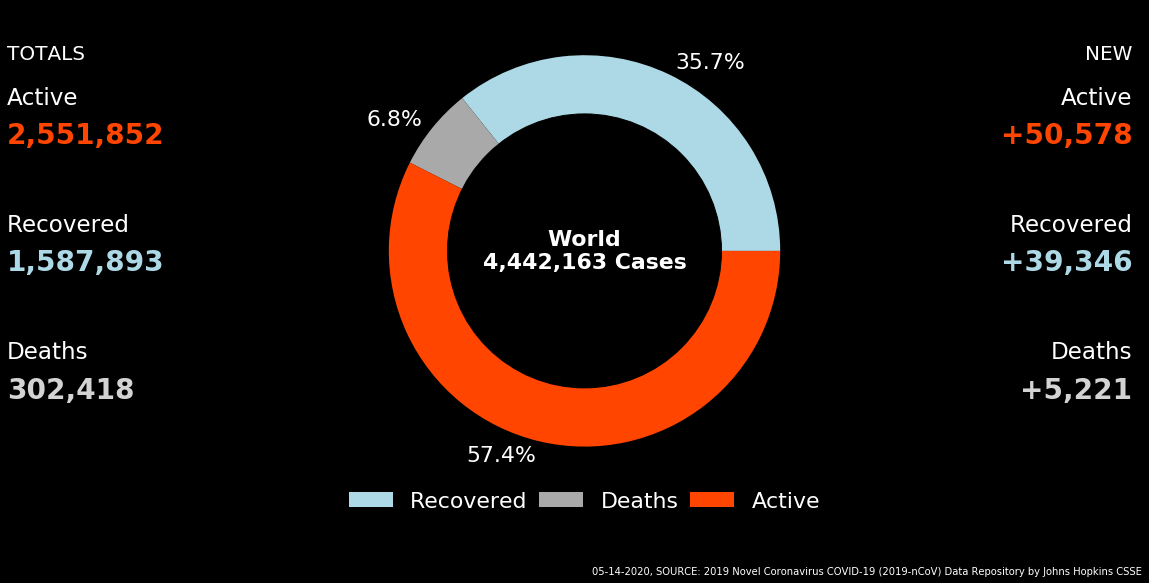

In [15]:
fig, ax = plt.subplots(1, figsize=(16,9), facecolor='black')
build_pie(details = True)
# Legend
legend = plt.legend(['Recovered', 'Deaths', 'Active'], frameon=False, 
           bbox_to_anchor=(0., -0.05, 1., -.102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=22)
plt.setp(legend.get_texts(), color='w')



# End of Legend
plt.savefig('img/world_pie.png', facecolor='black', edgecolor='none')

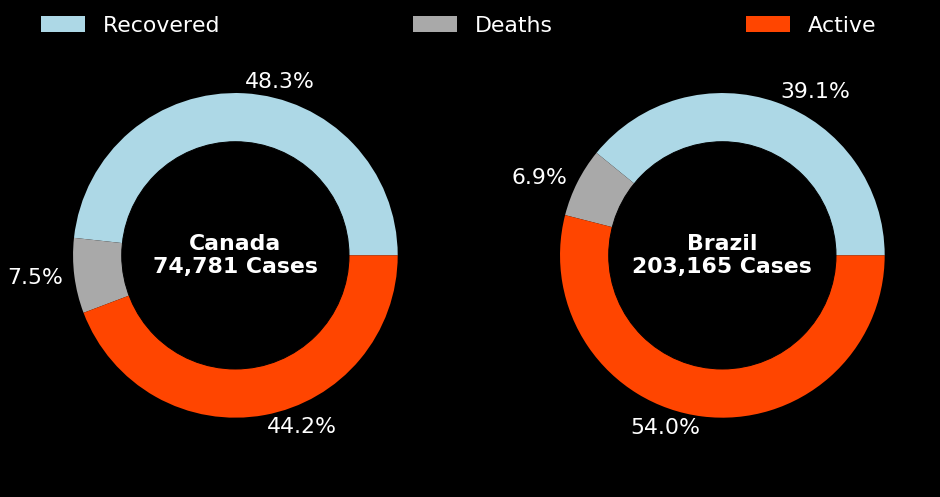

In [16]:
fig, ax = plt.subplots(1, figsize=(16,8), facecolor='black')

ax1 = fig.add_subplot(121, facecolor='black')
build_pie('Canada')

ax = fig.add_subplot(122, facecolor='black')
build_pie('Brazil')

# Legend
legend = plt.legend(['Recovered', 'Deaths', 'Active'], frameon=False, 
           bbox_to_anchor=(-1.2, 1.02, 2.1, .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=22)
plt.setp(legend.get_texts(), color='w')
# End of Legend

plt.savefig('img/selection_pie.png', facecolor='black', edgecolor='none')

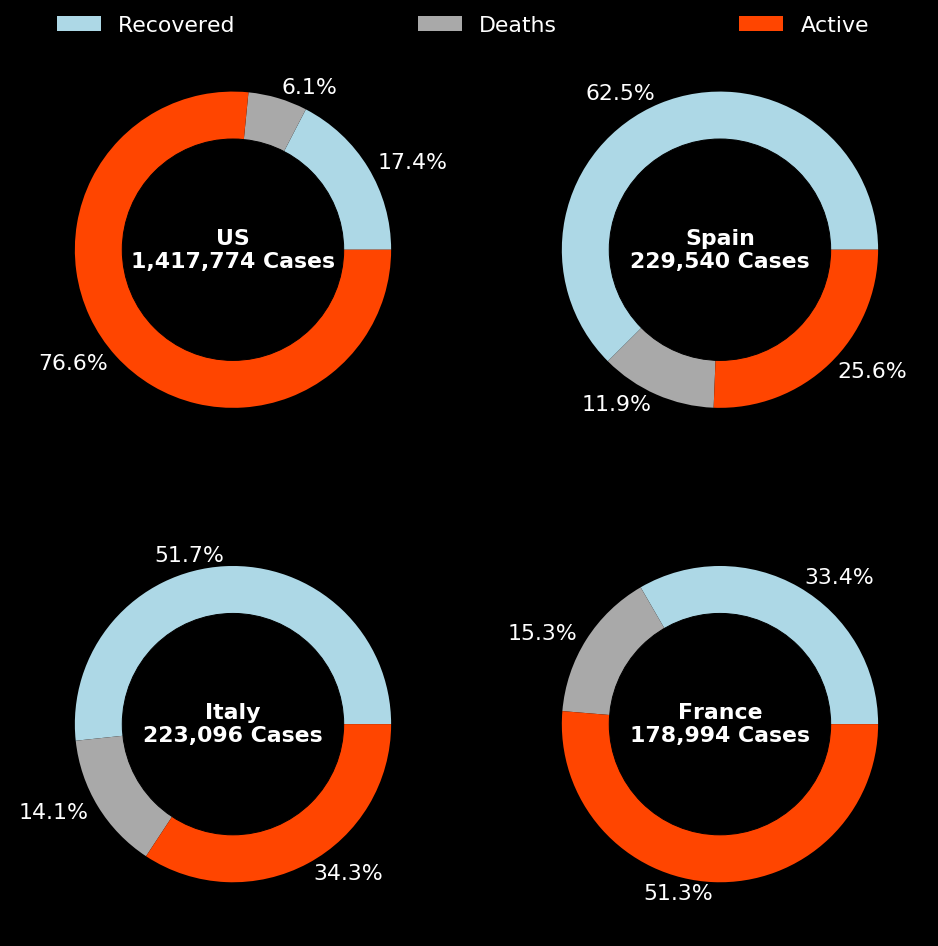

In [17]:
fig, ax = plt.subplots(1, figsize=(16,16), facecolor='black')

ax1 = fig.add_subplot(221, facecolor='black')
build_pie('US')

ax = fig.add_subplot(222, facecolor='black')
build_pie('Spain')

# Legend
legend = plt.legend(['Recovered', 'Deaths', 'Active'], frameon=False, 
           bbox_to_anchor=(-1.2, 1.02, 2.1, .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=22)
plt.setp(legend.get_texts(), color='w')
# End of Legend

ax = fig.add_subplot(223, facecolor='black')
build_pie('Italy')

ax = fig.add_subplot(224, facecolor='black')
build_pie('France')

plt.savefig('img/top_pie.png', facecolor='black', edgecolor='none')

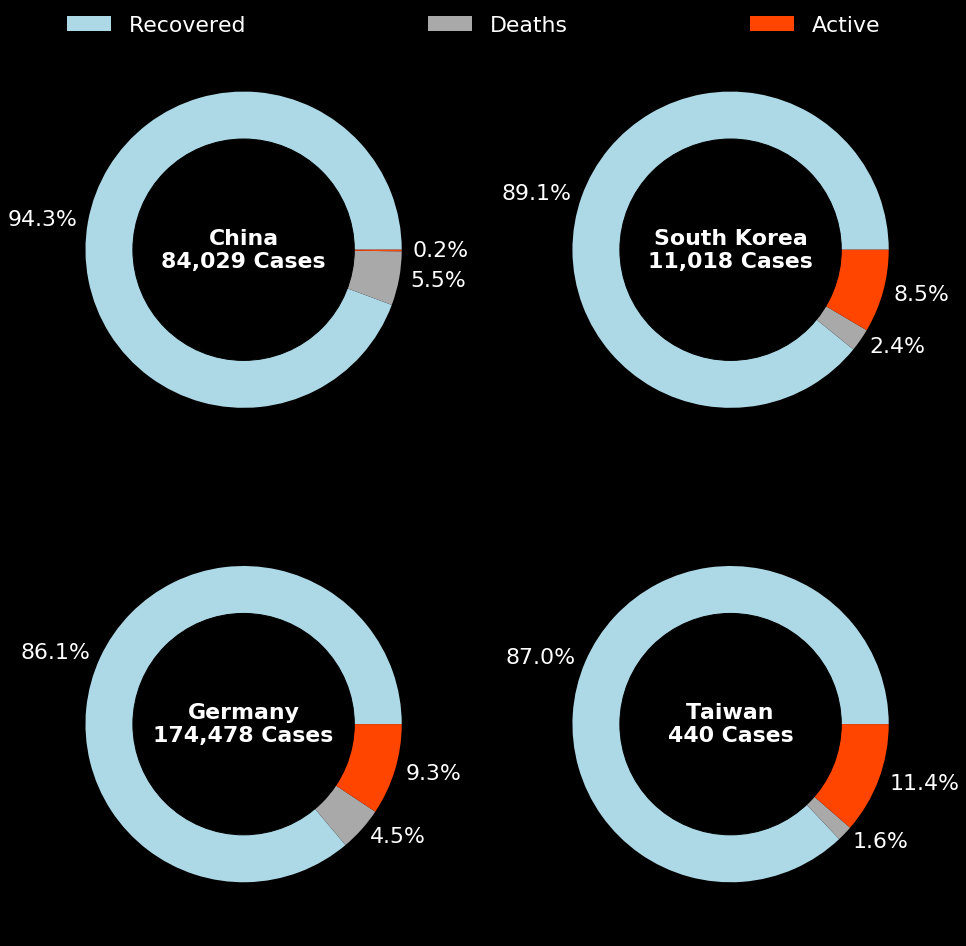

In [18]:
fig, ax = plt.subplots(1, figsize=(16,16), facecolor='black')
#plt.title('Recoveries and Deaths', color='white', fontsize=28)

ax1 = fig.add_subplot(221, facecolor='black')
build_pie(['China', 'Mainland China'])

ax = fig.add_subplot(222, facecolor='black')
build_pie(['South Korea', 'Korea, South'])

# Legend
legend = plt.legend(['Recovered', 'Deaths', 'Active'], frameon=False, 
           bbox_to_anchor=(-1.2, 1.02, 2.1, .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=22)
plt.setp(legend.get_texts(), color='w')
# End of Legend

ax = fig.add_subplot(223, facecolor='black')
build_pie('Germany')

ax = fig.add_subplot(224, facecolor='black')
build_pie(['Taiwan', 'Taiwan*'])

plt.savefig('img/rec_pie.png', facecolor='black', edgecolor='none')

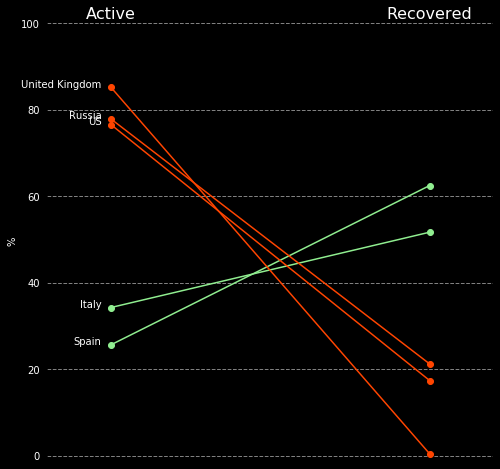

In [19]:
slope_df = build_df(file)
slope_df['r'] = slope_df['Recovered'] / slope_df['Confirmed'] * 100
slope_df['a'] = slope_df['Active'] / slope_df['Confirmed'] * 100
slope_df = slope_df.sort_values('Confirmed')[-5:]

countries = slope_df.Country.unique().tolist()
fig, ax = plt.subplots(1, figsize=(8,8), facecolor='black')

for name in countries:
    color = 'orangered'
    c_df = slope_df[slope_df['Country'] == name]
    
    if c_df['a'].values[0] < c_df['r'].values[0]:
        color='lightgreen'
        
    i = slope_df[slope_df['Country'] == name][['a', 'r']]

    plt.plot([1, 2], i.values[0], marker='o', color=color)
    plt.text(0.97, i.values[0][0], name, ha='right', color='white')
    
plt.text(1, 101, 'Active', ha='center', fontsize=16, color='white')
plt.text(2, 101, 'Recovered', ha='center', fontsize=16, color='white')

# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#Colors, labels, ticks
ax.set_facecolor('xkcd:black')
plt.xticks([])
plt.yticks(color='white')
plt.ylabel('%', color='white')
plt.ylim(-0.5,100)
plt.xlim(0.8, 2.2)

plt.show()

In [20]:
# deaths method 1
def plot_death_rate(ax, name, first_file='01-22-2020', start='01-23-2020', end=today, inverse=False):
    start = pd.to_datetime(start, format = "%m-%d-%Y")
    end = pd.to_datetime(end, format = "%m-%d-%Y")
    
    df = get_range(first_file, start, end)
    
    country = df[df['Country'].isin(name)]
    
    if inverse:
        country = df[~df['Country'].isin(name)]
        country = country.groupby('Date').sum()
    
    x = np.arange(0, len(country))
    plt.plot(x, country.Deaths /(country.Recovered+country.Deaths) * 100, color='red', linewidth = 2)
    plt.plot(x, country.Deaths /country.Confirmed * 100, color='orange', linewidth = 2)
    
    ax.fill_between(x, 
                    country.Deaths /country.Confirmed * 100,
                    country.Deaths /(country.Recovered+country.Deaths) * 100,
                    color='grey', alpha=0.8)
    
    # grid
    ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
    ax.set_axisbelow(True)

    # remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #title
    plt.ylim(-1,100)
    plt.xticks(x[::-10], labels = country.Date.values[::-10], 
                fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(['Concluded Cases Mortality', 'Confirmed Cases Mortality'])
    plt.title(name[0], color='white')
    plt.ylabel('%')
    ax.set_facecolor('xkcd:black')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')


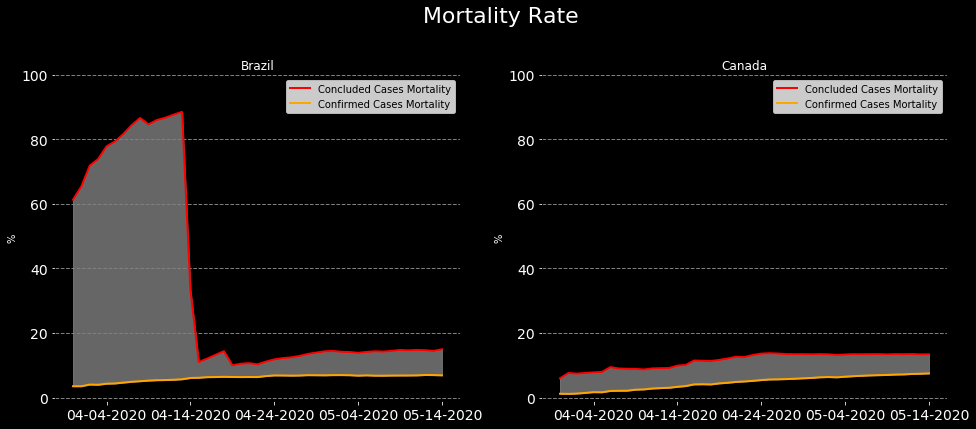

In [21]:
fig, ax = plt.subplots(1, figsize=(16,6), facecolor='black')
plt.title('Mortality Rate\n\n', color='white', fontsize=22)
ax.set_facecolor('black')

ax = fig.add_subplot(121)
plot_death_rate(ax, ['Brazil'], '03-31-2020', '04-01-2020')

ax = fig.add_subplot(122)
plot_death_rate(ax, ['Canada'], '03-31-2020', '04-01-2020')

plt.savefig('img/mort_selection.png', facecolor='black', edgecolor='none')

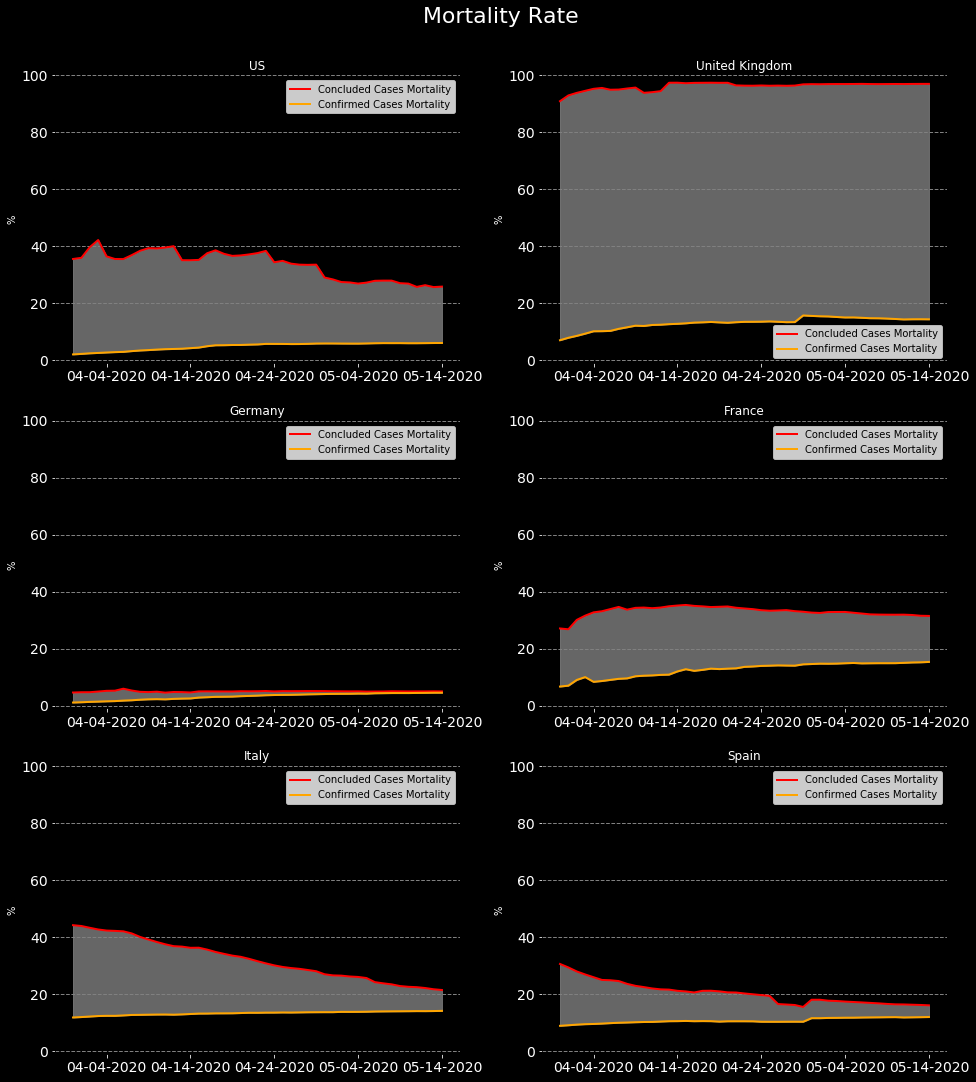

In [22]:
fig, ax = plt.subplots(1, figsize=(16,18), facecolor='black')
plt.title('Mortality Rate\n\n', color='white', fontsize=22)
ax.set_facecolor('black')

ax = fig.add_subplot(321)
plot_death_rate(ax, ['US'], '03-31-2020', '04-01-2020')

ax = fig.add_subplot(322)
plot_death_rate(ax, ['United Kingdom'], '03-31-2020', '04-01-2020')

ax = fig.add_subplot(323)
plot_death_rate(ax, ['Germany'], '03-31-2020', '04-01-2020')

ax = fig.add_subplot(324)
plot_death_rate(ax, ['France'], '03-31-2020', '04-01-2020')

ax = fig.add_subplot(325)
plot_death_rate(ax, ['Italy'], '03-31-2020', '04-01-2020')

ax = fig.add_subplot(326)
plot_death_rate(ax, ['Spain'], '03-31-2020', '04-01-2020')

plt.savefig('img/mort_top.png', facecolor='black', edgecolor='none')

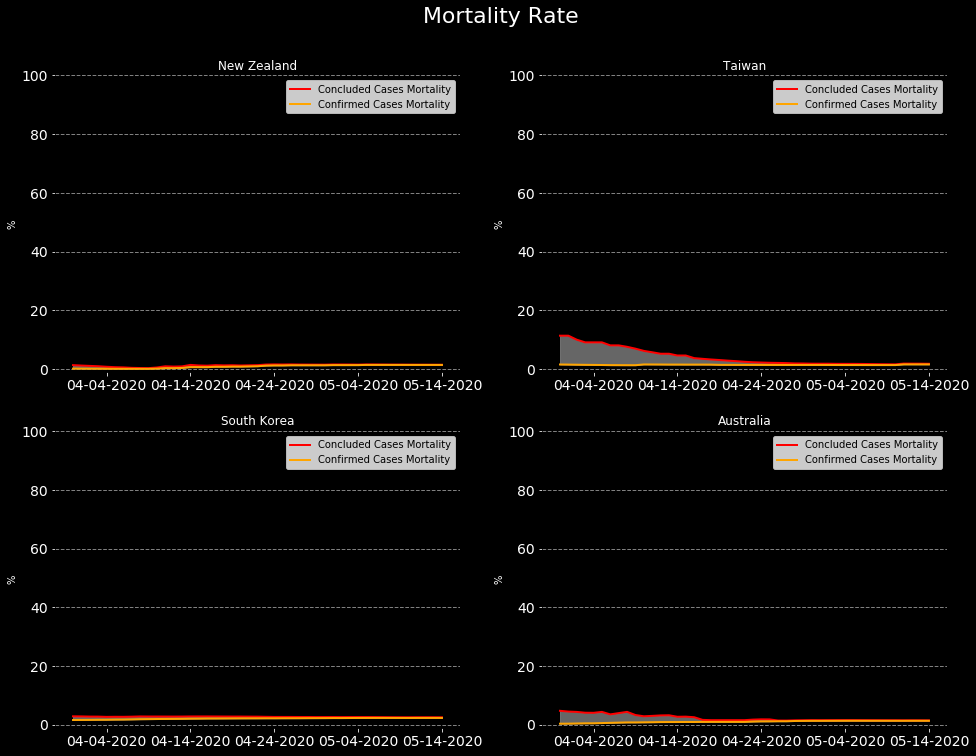

In [23]:
fig, ax = plt.subplots(1, figsize=(16,12), facecolor='black')
plt.title('Mortality Rate\n\n', color='white', fontsize=22)
ax.set_facecolor('black')

ax = fig.add_subplot(221)
plot_death_rate(ax, ['New Zealand'],
                '03-31-2020', '04-01-2020')

ax = fig.add_subplot(222)
plot_death_rate(ax, ['Taiwan', 'Taiwan*'], 
                '03-31-2020', '04-01-2020')

ax = fig.add_subplot(223)
plot_death_rate(ax, ['South Korea', 'Korea, South'], 
                '03-31-2020', '04-01-2020')

ax = fig.add_subplot(224)
plot_death_rate(ax, ['Australia'], '03-31-2020', '04-01-2020')


plt.savefig('img/mort_suc.png', facecolor='black', edgecolor='none')

In [24]:
df_owid = pd.read_csv(owid_path)
df_owid.head()

,Entity,ISO code,Date,Source URL,Source label,Notes,Cumulative total,Daily change in cumulative total,Cumulative total per thousand,Daily change in cumulative total per thousand,3-day rolling mean daily change,3-day rolling mean daily change per thousand,7-day rolling mean daily change,7-day rolling mean daily change per thousand
0,Argentina - tests performed,ARG,2020-04-08,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,13330,NaN,0.295,NaN,NaN,NaN,NaN,NaN
1,Argentina - tests performed,ARG,2020-04-09,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,14850,1520.0,0.329,0.034,NaN,NaN,NaN,NaN
2,Argentina - tests performed,ARG,2020-04-10,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,16379,1529.0,0.362,0.034,NaN,NaN,NaN,NaN
3,Argentina - tests performed,ARG,2020-04-11,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,18027,1648.0,0.399,0.036,1565.667,0.035,NaN,NaN
4,Argentina - tests performed,ARG,2020-04-13,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,19758,NaN,0.437,NaN,NaN,NaN,NaN,NaN


In [25]:
#today_owid = df_owid[df_owid['Date'] == str(today)[:10]]
t_labels = {'tests performed':'tests',
 'units unclear':'unclear',
 'samples tested':'tests',
 'people tested':'people tested',
 'People tested':'people tested',
 'samples analyzed':'tests',
 'cases tested':'people tested',
 'samples analysed':'tests',
 'samples processed':'tests',
 'tests sampled':'tests',
 'inconsistent units (COVID Tracking Project)':'unclear',
 'swabs tested':'tests',
 'specimens tested (CDC)':'tests',
 'samples':'tests'}

test_type = []
country = []

for i in df_owid.Entity.values:
    temp_list = i.split(' - ')
    
    country.append(temp_list[0])
    test_type.append(t_labels[temp_list[1]])
    
df_owid['Country'] = country
df_owid['test_type'] = test_type

today_owid = df_owid[df_owid['Date'] == '2020-04-27']

In [26]:
df_owid.head()

,Entity,ISO code,Date,Source URL,Source label,Notes,Cumulative total,Daily change in cumulative total,Cumulative total per thousand,Daily change in cumulative total per thousand,3-day rolling mean daily change,3-day rolling mean daily change per thousand,7-day rolling mean daily change,7-day rolling mean daily change per thousand,Country,test_type
0,Argentina - tests performed,ARG,2020-04-08,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,13330,NaN,0.295,NaN,NaN,NaN,NaN,NaN,Argentina,tests
1,Argentina - tests performed,ARG,2020-04-09,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,14850,1520.0,0.329,0.034,NaN,NaN,NaN,NaN,Argentina,tests
2,Argentina - tests performed,ARG,2020-04-10,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,16379,1529.0,0.362,0.034,NaN,NaN,NaN,NaN,Argentina,tests
3,Argentina - tests performed,ARG,2020-04-11,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,18027,1648.0,0.399,0.036,1565.667,0.035,NaN,NaN,Argentina,tests
4,Argentina - tests performed,ARG,2020-04-13,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,19758,NaN,0.437,NaN,NaN,NaN,NaN,NaN,Argentina,tests


In [27]:
def plot_tests(c, ttype):
    #plot
    for name in c:    
        temp = ttype[ttype.Country == name].copy()
        if(name == 'United States'):
            temp = temp[temp['test_type'] == 'unclear']
        plt.plot(pd.to_datetime(temp.Date), temp['Cumulative total'],
                linewidth=2)
    
    #legend and limits
    plt.legend(c, fontsize=16)
    
    plt.ylim(0,)
    
    # Ticks
    max_total = int(ttype[ttype['Country'].isin(c)].max()['Cumulative total'])
    mx = int(np.round(max_total , -5))
    divs = int(str(mx)[:2])
    if str(divs)[1] == '0':
        divs = 10
    elif divs > 30:
        divs = divs/3
    elif divs > 20:
        divs = divs/2

    
    ticks = np.arange(mx/divs, mx+1, mx/divs)
    
    labels = []
    for i in ticks:
        if i < 1000000:
            labels.append(str(i)[:-5]+'k')
        else:
            labels.append(str(i)[0]+'.'+str(i)[1]+'m')
    
    plt.yticks(ticks, labels=labels)
    
    plt.xticks(pd.date_range(pd.to_datetime('15-03-2020'),today)[::-5])
    plt.xlim(pd.to_datetime('15-03-2020'),today)
    # grid
    ax.grid(color='grey', linestyle='dashed', linewidth=1.5, axis = 'y')
    ax.set_axisbelow(True)
    
    # color
    ax.set_facecolor('xkcd:black')
    ax.tick_params(axis='x', colors='white', labelsize=14)
    ax.tick_params(axis='y', colors='white', labelsize=14)
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')

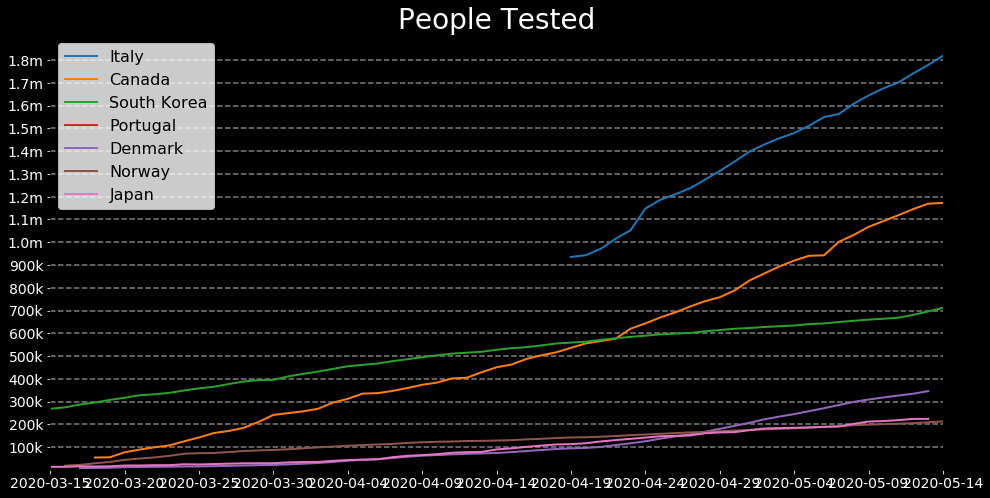

In [28]:
fig, ax = plt.subplots(1, figsize=(16,8), facecolor='black')

ttype = df_owid[df_owid['test_type'].isin(['people tested'])]
c = ['Italy', 'Canada', 'South Korea', 'Portugal', 'Denmark', 'Norway', 'Japan']

plot_tests(c, ttype)

plt.title('People Tested', color='white', fontsize=28)
plt.savefig('img/tests_p1.png', facecolor='black', edgecolor='none')

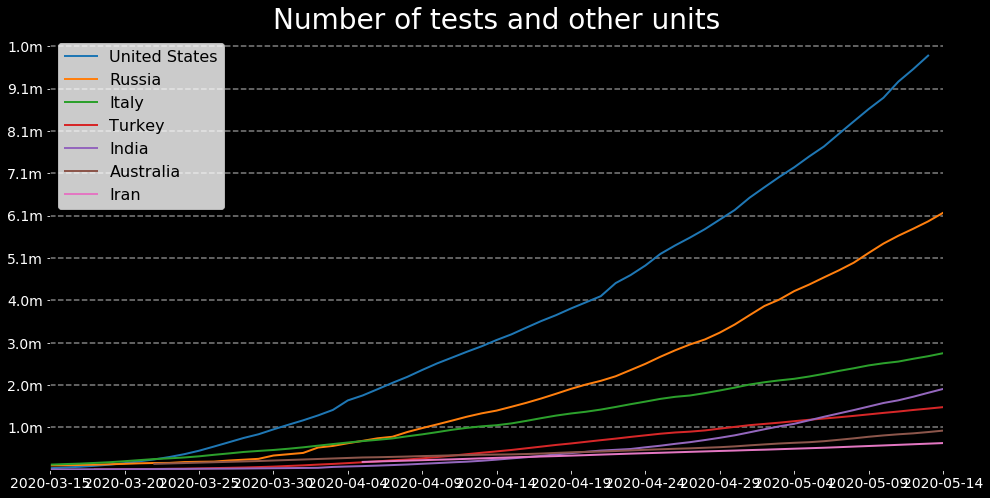

In [29]:
fig, ax = plt.subplots(1, figsize=(16,8), facecolor='black')

ttype = df_owid[df_owid['test_type'].isin(['tests', 'unclear'])]
c = ['United States', 'Russia', 'Italy', 'Turkey', 'India', 'Australia', 'Iran']

plot_tests(c, ttype)

plt.title('Number of tests and other units', color='white', fontsize=28)
plt.savefig('img/tests1.png', facecolor='black', edgecolor='none')

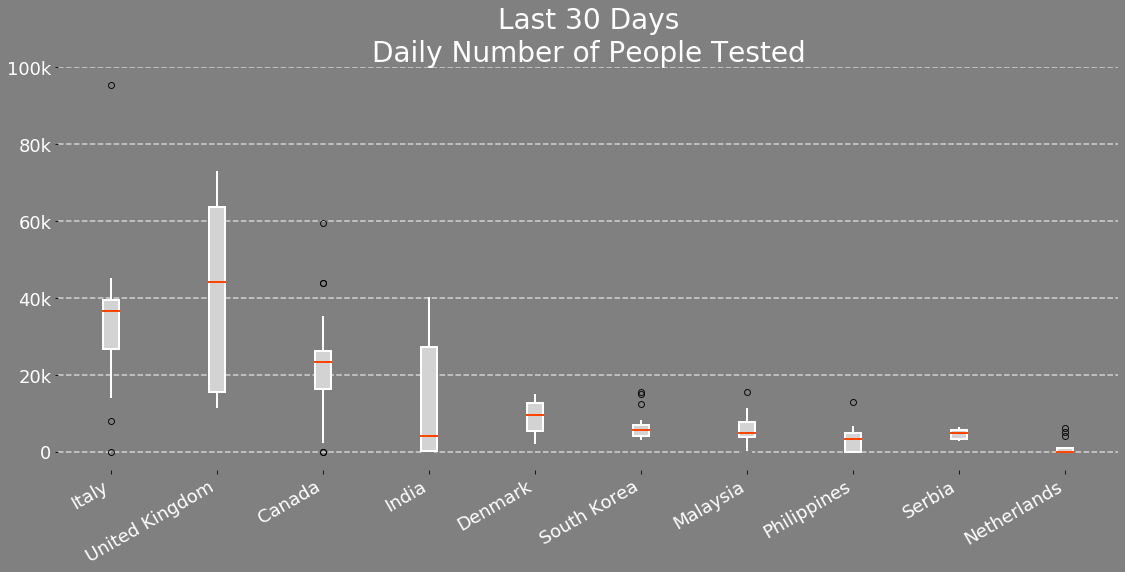

In [30]:
fig, ax = plt.subplots(1, figsize=(16,8), facecolor='grey')

ttype = df_owid[df_owid['test_type'].isin(['people tested'])]
c = ['Italy', 'United Kingdom', 'Canada', 'India', 'Denmark',
       'South Korea', 'Malaysia', 'Philippines', 'Serbia', 'Netherlands']

for i, name in enumerate(c):
    y = ttype[ttype['Country'] == name]['Daily change in cumulative total'][-30:]
    bp = ax.boxplot(y.fillna(0), positions=[i], patch_artist=True)
    
    for box in bp['boxes']:
        # change outline color
        box.set( color='white', linewidth=2)
        # change fill color
        box.set( facecolor = 'lightgrey' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='white', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='grey', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='orangered', linewidth=2)

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='blue', alpha=0.9)
    
ax.set_facecolor('grey')
# yticks
yticks = np.arange(0, 100001, 20000)
yticks_label =[0]+[str(i)[:-3] + 'k' for i in yticks[1:]]
plt.yticks(yticks, labels = yticks_label, fontsize=18, color='white')

plt.xticks(np.arange(len(c)), labels=c, color='white', 
           fontsize=18, rotation=30, ha='right')

# grid
ax.grid(color='lightgrey', linestyle='dashed', linewidth=1.5, axis = 'y')
ax.set_axisbelow(True)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Last 30 Days\nDaily Number of People Tested', color='white', fontsize=28)
plt.subplots_adjust(left=0.06, right=0.98, top=0.87, bottom=0.17)
plt.savefig('img/tests1.png', facecolor='grey', edgecolor='none')

In [31]:
ttype[ttype.Date == '2020-05-05'].sort_values('Cumulative total', ascending=False).Country[:11].values

array(['Italy', 'United Kingdom', 'Canada', 'South Korea', 'Denmark',
       'Malaysia', 'Japan', 'Philippines', 'Serbia', 'Qatar', 'Mexico'],
      dtype=object)

In [32]:
countries = ttype.Country.unique()
values = []
for c in countries:
    values.append(ttype[ttype['Country'] == c]['Daily change in cumulative total'][-30:].mean())

temp = pd.DataFrame(countries, columns=['country'])
temp['mean'] = values
temp.sort_values('mean', ascending=False)['country'][:10].values

array(['United Kingdom', 'Italy', 'Canada', 'India', 'Denmark',
       'Malaysia', 'South Korea', 'Netherlands', 'Philippines', 'Serbia'],
      dtype=object)

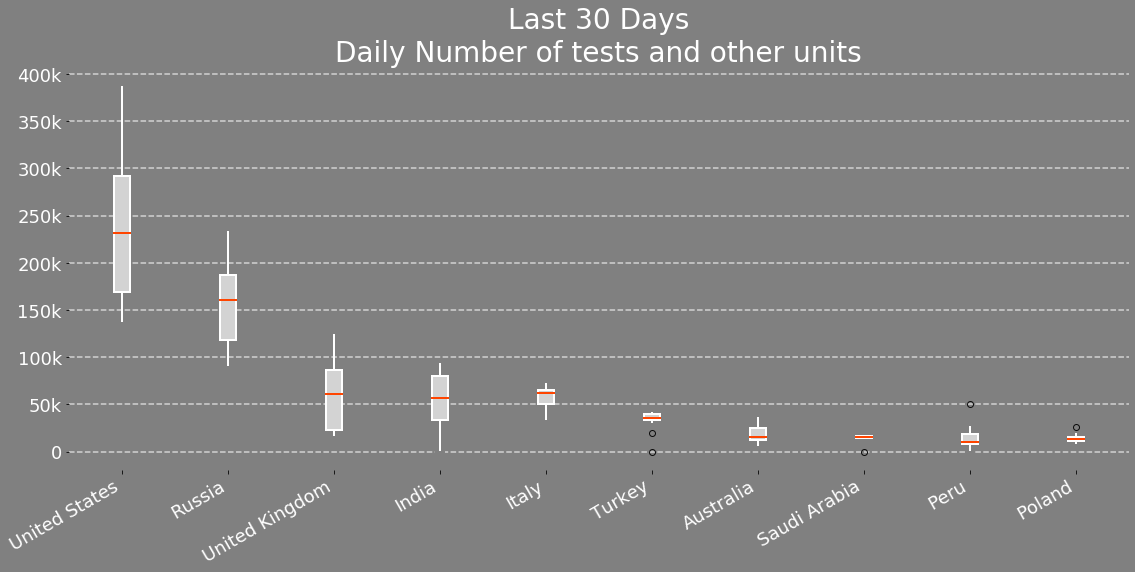

In [40]:
fig, ax = plt.subplots(1, figsize=(16,8), facecolor='grey')

ttype = df_owid[df_owid['test_type'].isin(['tests', 'unclear'])]
c = ['United States', 'Russia', 'United Kingdom', 'India', 'Italy',
       'Turkey', 'Australia', 'Saudi Arabia', 'Peru', 'Poland']

for i, name in enumerate(c):
    y = ttype[ttype['Country'] == name]['Daily change in cumulative total'][-30:]
    
    if(name == 'United States'):
            temp = ttype[ttype['Country'] == name]
            y = temp[temp['test_type'] == 'unclear']['Daily change in cumulative total'][-30:]
    
    bp = ax.boxplot(y.fillna(0), positions=[i], patch_artist=True)
    
    for box in bp['boxes']:
        # change outline color
        box.set( color='white', linewidth=2)
        # change fill color
        box.set( facecolor = 'lightgrey' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='white', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='grey', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='orangered', linewidth=2)

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='blue', alpha=0.9)
    
ax.set_facecolor('grey')
# yticks
yticks = np.arange(0, 400001, 50000)
yticks_label =[0]+[str(i)[:-3] + 'k' for i in yticks[1:]]
plt.yticks(yticks, labels = yticks_label, fontsize=18, color='white')

plt.xticks(np.arange(len(c)), labels=c, color='white', 
           fontsize=18, rotation=30, ha='right')

# grid
ax.grid(color='lightgrey', linestyle='dashed', linewidth=1.5, axis = 'y')
ax.set_axisbelow(True)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Last 30 Days\nDaily Number of tests and other units', color='white', fontsize=28)
plt.subplots_adjust(left=0.06, right=0.98, top=0.87, bottom=0.17)
plt.savefig('img/tests2.png', facecolor='grey', edgecolor='none')

In [34]:
ttype[ttype.Date == '2020-05-04'].sort_values('Cumulative total', ascending=False).Country[:10].values

array(['United States', 'Russia', 'Italy', 'United Kingdom', 'Turkey',
       'India', 'Australia', 'Iran', 'Portugal', 'Israel'], dtype=object)

In [35]:
countries = ttype.Country.unique()
values = []



for c in countries:
    if(c == 'United States'):
        temp = ttype[ttype['Country'] == c]
        temp = temp[temp['test_type'] == 'unclear']['Daily change in cumulative total'][-30:].mean()
    else:
        temp = ttype[ttype['Country'] == c]['Daily change in cumulative total'][-30:].mean()
        
    values.append(temp)
    

temp = pd.DataFrame(countries, columns=['country'])
temp['mean'] = values
temp.sort_values('mean', ascending=False)['country'][:10].values

array(['United States', 'Russia', 'United Kingdom', 'India', 'Italy',
       'Turkey', 'Australia', 'Saudi Arabia', 'Peru', 'Poland'],
      dtype=object)

In [36]:
from pywaffle import Waffle

In [37]:
scale = 10000
a = df[df['Date'] == file[:10]].sum()['Active']/scale
d = df[df['Date'] == file[:10]].sum()['Deaths']/scale
r = df[df['Date'] == file[:10]].sum()['Recovered']/scale

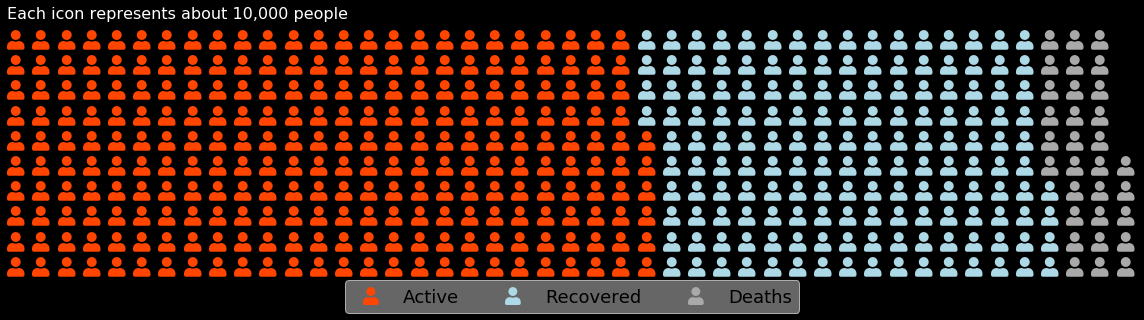

In [38]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    #columns=32, 
    values={ 'Active':a, 'Recovered':r, 'Deaths':d},
    #values=df_count,
    icons="user",
    colors=("orangered","lightblue", 'darkgrey'),
    figsize=(16, 6),  # figsize is a parameter of matplotlib.pyplot.figure
    facecolor = 'black',
    legend={'loc': 'lower center', 'bbox_to_anchor': (0, -0.2, 1, -0.1), 
            'ncol': 3, 'mode':'expande', 'fontsize':18, 'facecolor':'grey'},
    
    #bbox_to_anchor=(0., -0.05, 1., -.102), loc='lower left',
    #       ncol=3, mode="expand"
    icon_legend=True,
    edgecolor='white'
)
plt.title('Each icon represents about 10,000 people', color='white', fontsize=16, loc ='left')

plt.savefig('img/count.png', facecolor='black', edgecolor='none')

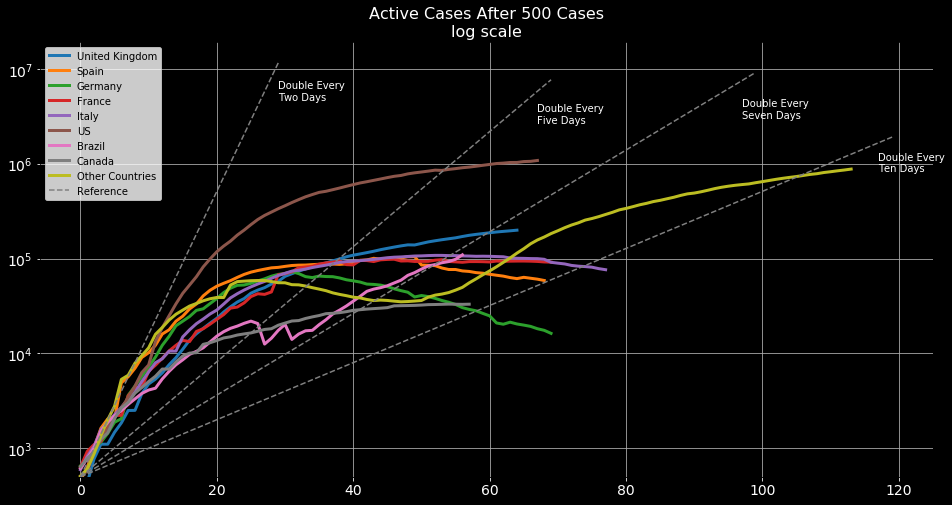

In [39]:
def plot_log(name, first_file='01-22-2020', start='01-23-2020', 
             end=today, inverse=False):
    start = pd.to_datetime(start, format = "%m-%d-%Y")
    end = pd.to_datetime(end, format = "%m-%d-%Y")    
    df = get_range(first_file, start, end)
    country = df[df['Country'].isin(name)]
    
    if inverse:
        country = df[~df['Country'].isin(name)]
        country = country.groupby('Date').sum()
        
    y = country.Active.values
    x = np.arange(len(y))
    plt.plot(x, y, linewidth=3)
    plt.yscale('log')

    
x = np.arange(0,120)
double_ten = []
double_seven = []
double_five = []
double_two = []
val = 500

for i in x:
    n = val*(pow(1.1043, i))
    double_seven.append(n)

for i in x:
    n = val*(pow(1.15, i))
    double_five.append(n)
    
for i in x:
    n = val*(pow(1.4143, i))
    double_two.append(n)

for i in x:
    n = val*(pow(1.0718, i))
    double_ten.append(n) 
    
fig, ax = plt.subplots(1, figsize=(16,8), facecolor='black')
    
plot_log(['United Kingdom'], '03-06-2020', '03-07-2020') 
plot_log(['Spain'], '03-07-2020', '03-08-2020')
plot_log(['Germany'], '03-06-2020', '03-07-2020')
plot_log(['France'], '03-06-2020', '03-07-2020')
plot_log(['Italy'], '02-27-2020', '02-28-2020')
plot_log(['US'], '03-08-2020', '03-09-2020')
plot_log(['Brazil'], '03-19-2020', '03-20-2020')
plot_log(['Canada'], '03-18-2020', '03-19-2020')
plot_log(['US', 'Brazil', 'Canada',
          'Italy', 'France', 'Germany',
          'Spain', 'United Kingdom'],  inverse=True)

plt.plot(x, double_ten, linestyle='--', color='grey')
plt.plot(x[:-20], double_seven[:-20], linestyle='--', color='grey')
plt.plot(x[:-50], double_five[:-50], linestyle='--', color='grey')
plt.plot(x[:-90], double_two[:-90], linestyle='--', color='grey')

plt.text(x[-3], double_ten[-10], 'Double Every\nTen Days', 
         va='center', color='white')
plt.text(x[-23], double_seven[-30], 'Double Every\nSeven Days', 
         va='center', color='white')
plt.text(x[-53], double_five[-57], 'Double Every\nFive Days', 
         va='center', color='white')
plt.text(x[-91], double_two[-93], 'Double Every\nTwo Days', 
         va='center', color='white')
#plt.title('linear')

plt.legend(['United Kingdom', 'Spain', 'Germany',
            'France', 'Italy', 'US', 'Brazil', 
            'Canada', 'Other Countries', 'Reference',])

ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white', labelsize=14)
ax.tick_params(axis='y', colors='white', labelsize=14)
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

plt.ylim(500,)
plt.title('Active Cases After 500 Cases\nlog scale',color='white', fontsize=16 )
plt.grid(True)
plt.savefig('img/active_log.png', facecolor='black', edgecolor='none')